# **Project:** Network Attack Detection

**Data set:** UNSW-NB15 Dataset

**Source of Data set:**  https://research.unsw.edu.au/projects/unsw-nb15-dataset

**Information about Data set**
> 1. Training set = 82,332 records 
2. Test set = 175,341 records
3. Features = 49 mentioned here. https://cloudstor.aarnet.edu.au/plus/apps/onlyoffice/s/2DhnLGDdEECo4ys?fileId=206777051

# What is Intrusion Detection System?

Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

**Detection Methods of IDS:**

**1. Signature-based Method:**

It detects the attacks on the basis of the

> 1.1. specific patterns such as number of bytes/ number of 1’s or number of 0’s in the network traffic. 

> 1.2. Known malicious instruction sequence that is used by the malware.

**2. Anomaly-detection Method:**

It detects the attacks using

> 2.1. Machine learning. It creates a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model 

**Which method is better?**

*Anomaly-detection Method* method is more accepted in comparison to signature-based IDS because the machine learning models can be trained according to the applications and hardware configurations.

















# Problem Statement

Network security is of prime importance these days. We need to protect our data and systems from attackers. A network attack attempts to gain unauthorized access to the network and take advantage of the vulnerablites of the network. 
In this project, we will predict the network attack that is happening over the network using the above mentioned dataset. 

The type of attacks investigated are: 
1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode 
9. Worms 

In [264]:
import pandas as pd   #for dataframes
import numpy as np  #for array

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.preprocessing import OneHotEncoder  #for encoding of categorical columns

Reading the Dataset csv using the link of another git hub repo. 

In [265]:
from google.colab import files
uploaded = files.upload()

In [266]:
train = pd.read_csv('UNSW_NB15_testing-set.csv')
test = pd.read_csv('UNSW_NB15_training-set.csv')
df = train.append(test)


In [267]:
df.shape

(257673, 45)

#**Prepare the dataset**

---



# Dropping unnecessary columns

One such column is 'id'

In [268]:
df = df.drop(['id'],axis=1)
test = test.drop(['id','attack_cat'],axis=1)
train = train.drop(['id','attack_cat'],axis=1)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


When we concatenate two DataFrames then we need to reset the index of the DataFrame. If the dataframe has a multiindex, this method can remove one or more levels. Otherwise if we don't do this, we get an error - "InvalidIndexError: Reindexing only valid with uniquely valued Index objects" 

In [269]:
df = df.reset_index(drop=True)

# Check for Missing Values

Since the dataset was clean, we donot have any missing values as seen below.

In [270]:
# checking for null values
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

Check what all network attacks are identified by the dataset

In [271]:
df['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

Getting name of all the columns of the dataset to see what should be the expected datatype of each column

In [272]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [273]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(df[col].value_counts())
    print()

0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



The col "is_ftp_login" has wrong values like 2 and 4. It should only have binary values like 0 and 1. If the ftp session is accessed by user using correct username and password then 1, otherwise 0. We need to fix this.

Therefore, we are replacing all the values other than 0 and 1 from these two columns.

In [274]:
df['is_ftp_login'] = np.where(df['is_ftp_login']>1, 1, df['is_ftp_login'])

In [275]:
df['is_ftp_login'].value_counts()

0    254428
1      3245
Name: is_ftp_login, dtype: int64

In [276]:
df['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In the feature "service" we see that we have "-". We need to replace that as well.

In [277]:
# removing all the "-" and replacing those with "None"
df['service'] = df['service'].apply(lambda x:"None" if x=="-" else x)

In [278]:
df['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In [279]:
# df = df.drop(columns=['attack_cat'])

In [280]:
df['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

# Label encoding



In our dataset we have few categorical columns with text data. But when we apply ML models to our data, then we need every data to be numerical. 

So we have to convert categorical columns to numerical columns in some way. We will use one hot encoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [281]:
from sklearn.preprocessing import LabelEncoder

categorical = []
for col in train.columns:
    if train[col].dtype == 'object':
             categorical.append(col)

for col in categorical:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))

#More EDA can be seen here: https://github.com/divyaKh/CMPE255Project/blob/main/2.EDA/Exploratory_Data_Analysis.ipynb

In [282]:
test.shape

(82332, 43)

#Feature importances on combined dataset



We will be using decison tree feature importance

#**CART classification**

In [283]:
combine = pd.DataFrame()
combine = train.append(test)
clf = DecisionTreeClassifier()
X=combine.drop(columns='label')
Y=combine['label']
clf.fit(X, Y)
feature_importance = clf.feature_importances_
importance_dict['combined'] =  feature_importance
importance_dict['combined']



array([6.93951957e-03, 1.59490364e-03, 2.67640814e-03, 6.10463775e-04,
       5.78307855e-03, 2.82791459e-03, 3.70479243e-02, 1.72533310e-02,
       6.61588319e-03, 5.37760124e-01, 2.44989669e-04, 1.03341982e-02,
       8.69546292e-03, 2.43000706e-03, 3.60071481e-04, 1.00924722e-02,
       6.39429490e-03, 6.71358715e-03, 7.22104920e-03, 0.00000000e+00,
       1.02704676e-02, 1.04222899e-02, 0.00000000e+00, 8.74394366e-03,
       6.65562255e-02, 8.54435777e-03, 6.63928737e-02, 1.17757112e-02,
       6.53526815e-05, 3.05547148e-03, 1.86483792e-02, 1.86427599e-04,
       5.21667111e-03, 4.04410113e-03, 3.29818075e-03, 3.70448333e-02,
       1.21070452e-04, 4.08748830e-05, 5.02880471e-03, 7.22615235e-03,
       6.17221273e-02, 0.00000000e+00])

10 fold CV

Feature: 0, Score: 0.00701
Feature: 1, Score: 0.00159
Feature: 2, Score: 0.00258
Feature: 3, Score: 0.00064
Feature: 4, Score: 0.00594
Feature: 5, Score: 0.00317
Feature: 6, Score: 0.03744
Feature: 7, Score: 0.01747
Feature: 8, Score: 0.00732
Feature: 9, Score: 0.53786
Feature: 10, Score: 0.00015
Feature: 11, Score: 0.00970
Feature: 12, Score: 0.00863
Feature: 13, Score: 0.00259
Feature: 14, Score: 0.00044
Feature: 15, Score: 0.01021
Feature: 16, Score: 0.00612
Feature: 17, Score: 0.00652
Feature: 18, Score: 0.00667
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01018
Feature: 21, Score: 0.01039
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00873
Feature: 24, Score: 0.06655
Feature: 25, Score: 0.00881
Feature: 26, Score: 0.06611
Feature: 27, Score: 0.01136
Feature: 28, Score: 0.00010
Feature: 29, Score: 0.00301
Feature: 30, Score: 0.01817
Feature: 31, Score: 0.00019
Feature: 32, Score: 0.00521
Feature: 33, Score: 0.00406
Feature: 34, Score: 0.00333
Feature: 35, Score: 0.03707
Fe

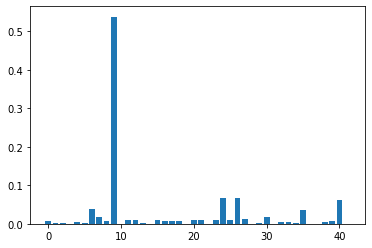

In [284]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [285]:
combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,119,0,5,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0
82328,1.106101,113,0,4,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0
82329,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0
82330,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0


In [286]:
combine.shape

(257673, 43)

#Preprocessing : 

In [287]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

In [288]:
def applyPCA(X, n_com):
   #print(data_set)
   pca = PCA(n_components=n_com).fit(X)
   X_train_pca = pca.transform(X)
   print(pca.n_components_)
   return X_train_pca

In [289]:
def applyMinMax(data):  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data)
  scaled_data=model.transform(data)
  return scaled_data
  #print(data_set)

In [290]:
def applyStandardScaler(data):
  scaler = StandardScaler()
  model = scaler.fit(data)
  scaled_data = model.transform(data)
  #print(data_set)
  return scaled_data

In [291]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [292]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)
X = pd.DataFrame(X, columns =['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'])

X_mm.shape

Apply MinMax scaler


(257673, 42)

In [293]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)


Apply MinMax scaler


In [294]:
X_mm_corr=combine.drop(columns='label')    
y_mm_corr=combine['label']
n_com=0.99
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm_corr = applyMinMax(X_mm_corr)
X_mm_corr = pd.DataFrame(X_mm_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_mm_corr)
print(col)
X_mm_corr.drop(X_mm_corr[col], axis=1, inplace=True)
X_mm_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss', 'ct_ftp_cmd']
['sloss', 'dloss', 'ct_ftp_cmd']


(257673, 39)

In [295]:
from sklearn.decomposition import PCA
X_pca=combine.drop(columns='label')    
y_pca=combine['label']
n_com=0.99
cols = X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape

Apply MinMax scaler
29


(257673, 29)

**WITHOUT PREPROCESSING**



**

In [297]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [298]:
X=combine.drop(columns='label')    
y=combine['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




XGB

In [299]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_y)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28065
           1       0.95      0.95      0.95     49237

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25513  2552]
 [ 2662 46575]]
XGBoost model accuracy score: 0.9326


GB

In [300]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_y))
print(metrics.confusion_matrix(y_test, predicted_gb_y))
print('Gradient model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_y)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     28065
           1       0.94      0.95      0.95     49237

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25306  2759]
 [ 2471 46766]]
Gradient model accuracy score: 0.9323


DT

In [301]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
model.fit(X_train, y_train)
predicted_dt_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_y))
print(metrics.confusion_matrix(y_test, predicted_dt_y))
print('Decision trees model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_y)))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     28065
           1       0.83      1.00      0.91     49237

    accuracy                           0.87     77302
   macro avg       0.92      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[18133  9932]
 [    0 49237]]
Decision trees model accuracy score: 0.8715


RT

In [302]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
predicted_rt_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_y))
print(metrics.confusion_matrix(y_test, predicted_gb_y))
print('Random Forest model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_y)))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     28065
           1       0.83      1.00      0.91     49237

    accuracy                           0.87     77302
   macro avg       0.91      0.82      0.84     77302
weighted avg       0.89      0.87      0.86     77302

[[25306  2759]
 [ 2471 46766]]
Random Forest model accuracy score: 0.8685


**WITH PCA AND STANDARD SCALER**

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3)

XGB

In [304]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_pca_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_pca_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_pca_y)))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     27884
           1       0.89      0.97      0.93     49418

    accuracy                           0.90     77302
   macro avg       0.91      0.88      0.89     77302
weighted avg       0.91      0.90      0.90     77302

[[22110  5774]
 [ 1605 47813]]
XGBoost model accuracy score: 0.9045


GB 

In [305]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_pca_y))
print(metrics.confusion_matrix(y_test, predicted_gb_y))
print('Gradient  model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_pca_y)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     27884
           1       0.90      0.96      0.93     49418

    accuracy                           0.91     77302
   macro avg       0.91      0.88      0.90     77302
weighted avg       0.91      0.91      0.91     77302

[[10073 17811]
 [17704 31714]]
Gradient  model accuracy score: 0.9069


DT

In [307]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
model.fit(X_train, y_train)
predicted_dt_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_pca_y))
print(metrics.confusion_matrix(y_test, predicted_dt_pca_y))
print('Decison trees model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_pca_y)))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     27884
           1       0.84      0.98      0.91     49418

    accuracy                           0.87     77302
   macro avg       0.90      0.83      0.85     77302
weighted avg       0.88      0.87      0.87     77302

[[18850  9034]
 [  916 48502]]
Decison trees model accuracy score: 0.8713


RT

In [308]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
predicted_rt_pca_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_pca_y))
print(metrics.confusion_matrix(y_test, predicted_gb_pca_y))
print('Random Forest model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_pca_y)))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74     27884
           1       0.81      1.00      0.90     49418

    accuracy                           0.85     77302
   macro avg       0.90      0.80      0.82     77302
weighted avg       0.88      0.85      0.84     77302

[[22484  5400]
 [ 1798 47620]]
Random Forest model accuracy score: 0.8522


**WITH REMOVING CORRELATION (AMONG FEATURES) AND MINMAX SCALING**

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X_mm_corr, y_mm_corr, test_size=0.3)

XGB

In [310]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_mm_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_mm_corr_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_mm_corr_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_mm_corr_y)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     28049
           1       0.95      0.94      0.95     49253

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25584  2465]
 [ 2773 46480]]
XGBoost model accuracy score: 0.9322


GB

In [312]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_mm_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_mm_corr_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_corr_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_mm_corr_y)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     28049
           1       0.94      0.95      0.95     49253

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25216  2833]
 [ 2437 46816]]
XGBoost model accuracy score: 0.9318


DT

In [313]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
model.fit(X_train, y_train)
predicted_dt_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_y))
print(metrics.confusion_matrix(y_test, predicted_dt_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_y)))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     28049
           1       0.83      1.00      0.91     49253

    accuracy                           0.87     77302
   macro avg       0.92      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[18127  9922]
 [    0 49253]]
XGBoost model accuracy score: 0.8716


RT

In [314]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
predicted_rt_mm_corr_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_mm_corr_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_corr_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_mm_corr_y)))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     28049
           1       0.83      0.99      0.91     49253

    accuracy                           0.87     77302
   macro avg       0.91      0.82      0.84     77302
weighted avg       0.89      0.87      0.86     77302

[[25216  2833]
 [ 2437 46816]]
XGBoost model accuracy score: 0.8683


**WITH MINMAX SCALING**



In [315]:
X_train, X_test, y_train, y_test = train_test_split(X_mm, y_mm, test_size=0.3)

XGB

In [318]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predicted_xgb_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_xgb_mm_y))
print(metrics.confusion_matrix(y_test, predicted_xgb_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_xgb_mm_y)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27958
           1       0.95      0.95      0.95     49344

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25532  2426]
 [ 2710 46634]]
XGBoost model accuracy score: 0.9336


GB

In [319]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predicted_gb_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_gb_mm_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_gb_mm_y)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27958
           1       0.95      0.95      0.95     49344

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25254  2704]
 [ 2464 46880]]
XGBoost model accuracy score: 0.9331


DT

In [323]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
model.fit(X_train, y_train)
predicted_dt_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_dt_mm_y))
print(metrics.confusion_matrix(y_test, predicted_dt_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_dt_mm_y)))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     27958
           1       0.83      1.00      0.91     49344

    accuracy                           0.87     77302
   macro avg       0.92      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[18111  9847]
 [    0 49344]]
XGBoost model accuracy score: 0.8726


RT

In [324]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
predicted_rt_mm_y = model.predict(X_test)
print(metrics.classification_report(y_test, predicted_rt_mm_y))
print(metrics.confusion_matrix(y_test, predicted_gb_mm_y))
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predicted_rt_mm_y)))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     27958
           1       0.83      1.00      0.91     49344

    accuracy                           0.87     77302
   macro avg       0.91      0.82      0.85     77302
weighted avg       0.89      0.87      0.86     77302

[[25254  2704]
 [ 2464 46880]]
XGBoost model accuracy score: 0.8704
